In [2]:
#Capstone 1 Exploratory Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('precision',3)
#shows only 3 decimals
%matplotlib inline

In [4]:
%run Capstone1-Divorce,Lat,suicide.ipynb

In [5]:
eurocide= suicideDf[suicideDf['country'].isin(europels)]
eurocide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [6]:
eurocide[['country','age','year','suicides/100k pop']].nlargest(10,columns='suicides/100k pop')
#top 10 results. Hungary has 7 

,country,age,year,suicides/100k pop
11376,Hungary,75+ years,1992,177.61
11388,Hungary,75+ years,1993,177.57
11364,Hungary,75+ years,1991,176.91
11400,Hungary,75+ years,1994,176.26
11412,Hungary,75+ years,1995,165.96
11460,Hungary,75+ years,1999,162.67
11436,Hungary,75+ years,1997,161.92
15056,Lithuania,35-54 years,1996,151.33
15044,Lithuania,35-54 years,1995,144.85
23108,Slovenia,75+ years,2001,144.71


In [7]:
eurocide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11908 entries, 0 to 26847
Data columns (total 10 columns):
country               11908 non-null object
year                  11908 non-null int64
sex                   11908 non-null object
age                   11908 non-null object
suicides_no           11908 non-null int64
population            11908 non-null int64
suicides/100k pop     11908 non-null float64
 gdp_for_year ($)     11908 non-null object
gdp_per_capita ($)    11908 non-null int64
generation            11908 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 1023.3+ KB


In [8]:
totaldeath_byage= eurocide.groupby('age')['suicides_no'].sum().reindex(['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
totaldeath_byage

age
5-14 years       9183
15-24 years    175844
25-34 years    302309
35-54 years    815428
55-74 years    624545
75+ years      287994
Name: suicides_no, dtype: int64

Text(0.5, 1.0, 'European total suicides by age group')

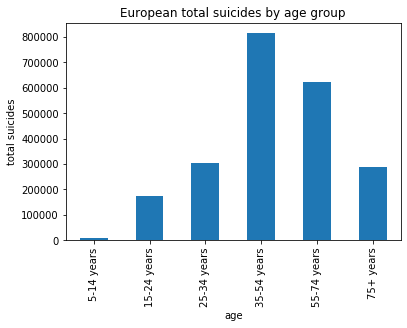

In [9]:
totaldeath_byage.plot(kind='bar')
plt.ylabel('total suicides')
plt.title('European total suicides by age group')
#age 35-54 has the highest count over the years in Europe

In [10]:
yearavg_byage= eurocide.groupby('age')['suicides/100k pop'].mean().reindex(['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
yearavg_byage

age
5-14 years      0.511
15-24 years     9.028
25-34 years    13.479
35-54 years    19.234
55-74 years    21.495
75+ years      32.238
Name: suicides/100k pop, dtype: float64

Text(0.5, 1.0, 'European average suicides per 100k pop by age group')

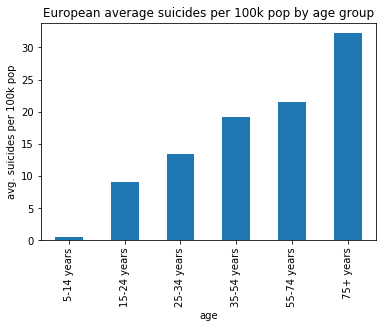

In [11]:
yearavg_byage.plot(kind='bar')
plt.ylabel('avg. suicides per 100k pop')
plt.title('European average suicides per 100k pop by age group')
#75+ has highest yearly avg of suicides

Text(0.5, 1.0, 'European average suicides per 100k pop by year')

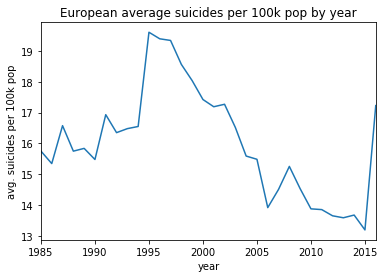

In [12]:
eurocide.groupby('year')['suicides/100k pop'].mean().plot()
plt.ylabel('avg. suicides per 100k pop')
plt.title('European average suicides per 100k pop by year')

In [13]:
eurocide.groupby('year')['suicides_no'].count().tail(3)
#skewed by less results at the tail and head. Only 100 2016 results. Rates are on a relative decline since 1995.

year
2014    432
2015    360
2016    100
Name: suicides_no, dtype: int64

In [14]:
eurocide[eurocide['year']==2016]['country'].value_counts()
#includes Hungary and Lithuania which we know are high. Results likely skewed.

Czech Republic    10
Romania           10
Iceland           10
Netherlands       10
Lithuania         10
Armenia           10
Hungary           10
Croatia           10
Sweden            10
Austria           10
Name: country, dtype: int64

In [15]:
meanby_yearsex= eurocide.groupby(['year','sex']).agg(mean100kyear=pd.NamedAgg(column='suicides/100k pop',aggfunc='mean'))
#avg number of suicides per 100k by year and gender in europe
meanby_yearsex

mean100kyear
year sex                 
1985 female         7.940
     male          23.558
1986 female         8.076
     male          22.612
1987 female         8.395
...                   ...
2014 male          22.049
2015 female         5.519
     male          20.859
2016 female         6.425
     male          28.031

[64 rows x 1 columns]

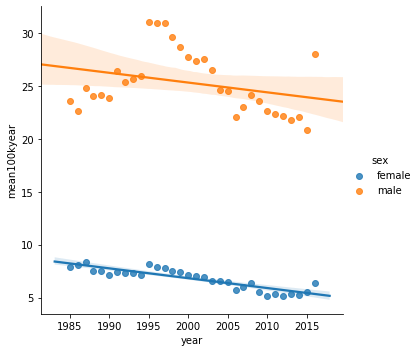

In [16]:
sns.lmplot(data=meanby_yearsex.reset_index(),x='year',y='mean100kyear',hue='sex')
#males are much more likely to commit suicide, with more variance

In [17]:
malefe= eurocide.groupby('sex')[['suicides_no']].sum()
malefe['fraction_of_total']=malefe['suicides_no'].apply(lambda x: x / eurocide['suicides_no'].sum())
malefe

,suicides_no,fraction_of_total
sex,,
female,527427,0.238
male,1687876,0.762


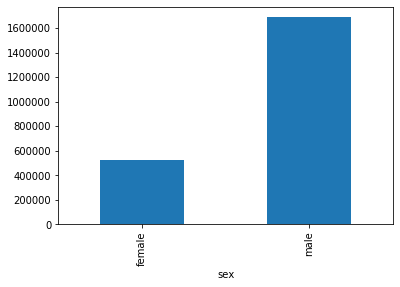

In [18]:
malefe['suicides_no'].plot(kind='bar')
#Men were 3 times more likely to commit suicide over the period

In [19]:
eurocide.groupby('country')['suicides/100k pop'].mean().sort_values(ascending=False).head(10)
#Over all years, these are the top 10 countries by mean suicide/100k

country
Lithuania    40.416
Hungary      32.762
Belarus      31.076
Latvia       29.259
Slovenia     27.828
Estonia      27.277
Ukraine      26.582
Austria      23.760
Croatia      22.835
Finland      22.770
Name: suicides/100k pop, dtype: float64

In [20]:
EUdivorce= EUdivorce.reset_index().rename(columns={'country_name':'country', 'mean':'mean divorce rate/1000'})

In [21]:
EUdivorce.head()

,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean divorce rate/1000,latitude
0,Belgium,2.8,2.8,3.3,3.0,2.7,2.5,2.3,2.2,2.2,2.2,2.1,2.0,2.508,50.504
1,Bulgaria,2.0,2.2,1.9,1.6,1.5,1.4,1.6,1.5,1.5,1.5,1.5,1.5,1.642,42.734
2,Czech Republic,3.1,3.0,3.0,2.8,2.9,2.7,2.5,2.7,2.5,2.5,2.4,2.4,2.708,49.817
3,Denmark,2.6,2.6,2.7,2.7,2.6,2.6,2.8,3.4,3.4,2.9,3.0,2.6,2.825,56.264
4,Germany,2.3,2.3,2.3,2.3,2.3,2.3,2.2,2.1,2.1,2.0,2.0,1.9,2.175,51.166


In [22]:
eurocidetemp= pd.merge(eurocide, EUdivorce[['country','mean divorce rate/1000','latitude']], how='left',on='country')
eurocidetemp.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,mean divorce rate/1000,latitude
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,NaN,NaN
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,NaN,NaN
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,NaN,NaN
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,NaN,NaN
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,NaN,NaN


In [23]:
eurocide_notna= eurocidetemp[eurocidetemp.latitude.notna()]

In [24]:
suicidevlat= eurocide_notna.groupby('country')[['suicides/100k pop','mean divorce rate/1000', 'latitude']].mean().reset_index()

In [25]:
suicidevlat.head()

,country,suicides/100k pop,mean divorce rate/1000,latitude
0,Austria,23.760,2.100,47.516
1,Azerbaijan,1.855,1.142,40.143
2,Belarus,31.076,3.700,53.710
3,Belgium,21.238,2.508,50.504
4,Bulgaria,19.489,1.642,42.734


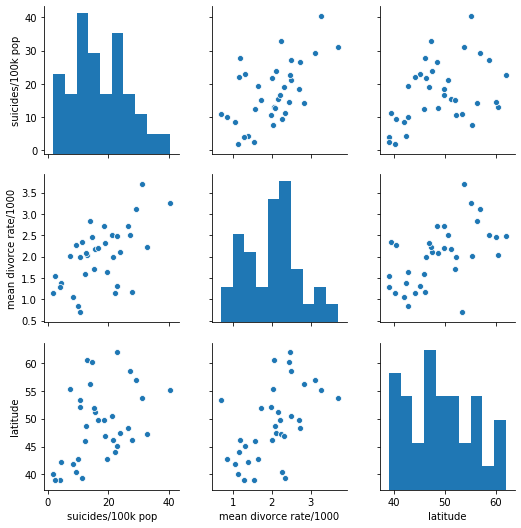

In [26]:
sns.pairplot(suicidevlat)
#all of the variables seem to have a positive correlation with each other, especially divorce rate w/ suicides

In [27]:
suicidevlat.corr()

,suicides/100k pop,mean divorce rate/1000,latitude
suicides/100k pop,1.000,0.575,0.416
mean divorce rate/1000,0.575,1.000,0.545
latitude,0.416,0.545,1.000


In [28]:
%run Capstone1-main.ipynb

<class 'pandas.core.frame.DataFrame'>
Index: 3965 entries, Afghanistan to Last Updated: 10/28/2019
Data columns (total 20 columns):
Country Code     3960 non-null object
Series Name      3960 non-null object
Series Code      3960 non-null object
2000 [YR2000]    3960 non-null object
2001 [YR2001]    3960 non-null object
2002 [YR2002]    3960 non-null object
2003 [YR2003]    3960 non-null object
2004 [YR2004]    3960 non-null object
2005 [YR2005]    3960 non-null object
2006 [YR2006]    3960 non-null object
2007 [YR2007]    3960 non-null object
2008 [YR2008]    3960 non-null object
2009 [YR2009]    3960 non-null object
2010 [YR2010]    3960 non-null object
2011 [YR2011]    3960 non-null object
2012 [YR2012]    3960 non-null object
2013 [YR2013]    3960 non-null object
2014 [YR2014]    3960 non-null object
2015 [YR2015]    3960 non-null object
2016 [YR2016]    3960 non-null object
dtypes: object(20)
memory usage: 650.5+ KB


In [29]:
europeDf.head()

Series_name,Country Name,Year,Access to electricity (% of population),"Birth rate, crude (per 1,000 people)",CO2 emissions (metric tons per capita),Current health expenditure per capita (current US$),"Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),Fixed broadband subscriptions (per 100 people),"GNI per capita, PPP (current international $)",Individuals using the Internet (% of population),Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),"Population, total","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (national estimate)",Urban population (% of total population)
0,Albania,2000,100.0,16.436,0.978,75.531,5.914,1449.647,0.0,3980.0,0.114,0.952,112.738,3.089e+06,19.3,14.9,41.741
1,Albania,2001,100.0,15.590,1.053,81.946,5.879,1351.231,0.0,4440.0,0.326,12.546,111.685,3.060e+06,19.9,14.2,42.435
2,Albania,2002,100.0,14.790,1.230,89.858,5.891,1578.166,0.0,4780.0,0.390,27.222,111.351,3.051e+06,19.1,13.6,43.501
3,Albania,2003,100.0,14.048,1.413,113.584,5.952,1469.265,0.0,5130.0,0.972,35.279,110.935,3.040e+06,18.2,12.9,44.573
4,Albania,2004,100.0,13.381,1.376,151.981,6.061,1797.525,0.0,5550.0,2.420,40.568,110.472,3.027e+06,17.5,12.4,45.651


In [30]:
europeDf= europeDf.rename(columns={'Country Name':'country','Year':'year'})
#prepare for merge

In [31]:
europeDf['year']=europeDf.year.astype('int64')
#convert year from string to int

In [32]:
eurocidetemp2= pd.merge(eurocide, europeDf[['country','year','Mobile cellular subscriptions (per 100 people)','Electric power consumption (kWh per capita)','Population density (people per sq. km of land area)']],how='left',on=['country','year'])

In [33]:
#country v year dot chart

In [34]:
eurocidetemp2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,Mobile cellular subscriptions (per 100 people),Electric power consumption (kWh per capita),Population density (people per sq. km of land area)
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,NaN,NaN,NaN
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,NaN,NaN,NaN
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,NaN,NaN,NaN
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,NaN,NaN,NaN
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,NaN,NaN,NaN


In [35]:
eurocide_others= eurocidetemp2[eurocidetemp2['Mobile cellular subscriptions (per 100 people)'].notna()]

In [36]:
eurocide_others.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,Mobile cellular subscriptions (per 100 people),Electric power consumption (kWh per capita),Population density (people per sq. km of land area)
132,Albania,2000,male,25-34 years,17,232000,7.33,"3,632,043,908",1299,Generation X,0.952,1449.647,112.738
133,Albania,2000,male,55-74 years,10,177400,5.64,"3,632,043,908",1299,Silent,0.952,1449.647,112.738
134,Albania,2000,female,75+ years,2,37800,5.29,"3,632,043,908",1299,G.I. Generation,0.952,1449.647,112.738
135,Albania,2000,male,75+ years,1,24900,4.02,"3,632,043,908",1299,G.I. Generation,0.952,1449.647,112.738
136,Albania,2000,female,15-24 years,6,263900,2.27,"3,632,043,908",1299,Generation X,0.952,1449.647,112.738


In [37]:
eurocide_others = eurocide_others.groupby('year',as_index=False)[['suicides/100k pop','Mobile cellular subscriptions (per 100 people)','Electric power consumption (kWh per capita)']].mean()
#condensing other variables

In [38]:
eurocide_others.tail()

,year,suicides/100k pop,Mobile cellular subscriptions (per 100 people),Electric power consumption (kWh per capita)
12,2012,13.732,125.214,8006.109
13,2013,13.631,123.479,7973.938
14,2014,13.746,123.544,7722.428
15,2015,13.514,124.387,0.000
16,2016,18.692,120.421,0.000


In [39]:
eurocide_others.iloc[:16].corr()
#removed 2016 which seems to be outlier

,year,suicides/100k pop,Mobile cellular subscriptions (per 100 people),Electric power consumption (kWh per capita)
year,1.000,-0.952,0.939,-0.229
suicides/100k pop,-0.952,1.000,-0.967,0.097
Mobile cellular subscriptions (per 100 people),0.939,-0.967,1.000,-0.033
Electric power consumption (kWh per capita),-0.229,0.097,-0.033,1.000


In [40]:
eurocide_others=eurocide_others.iloc[:16]

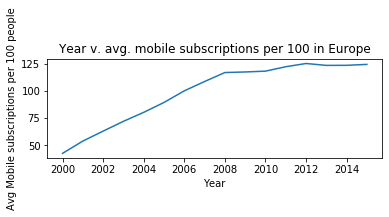

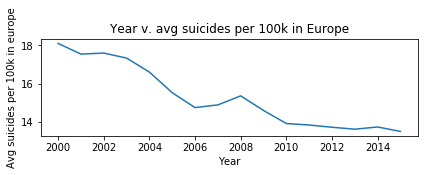

In [41]:
year=eurocide_others['year']
mobile= eurocide_others['Mobile cellular subscriptions (per 100 people)']
suicides= eurocide_others['suicides/100k pop']

plt.subplot(2,1,1)
plt.plot(year,mobile)
plt.title('Year v. avg. mobile subscriptions per 100 in Europe')
plt.xlabel('Year')
plt.ylabel('Avg Mobile subscriptions per 100 people')
plt.show()

plt.subplot(2,1,2)
plt.plot(year,suicides)
plt.xlabel('Year')
plt.ylabel('Avg suicides per 100k in europe')
plt.title('Year v. avg suicides per 100k in Europe')
plt.tight_layout()
plt.show()

In [42]:
#suicide rates seem to be negatively correlated with mobile subscriptions

In [51]:
eurocide_others= eurocidetemp2[eurocidetemp2['Mobile cellular subscriptions (per 100 people)'].notna()]

In [58]:

def yearplot(year):
    data= eurocide_others[eurocide_others.year== year]
    data.groupby('country', as_index=False)[['Mobile cellular subscriptions (per 100 people)','suicides/100k pop']].mean().plot.scatter('Mobile cellular subscriptions (per 100 people)','suicides/100k pop')
    
    plt.axis(ymin=0,ymax=45,xmin=0, xmax=180)

In [59]:
from IPython.display import display
from ipywidgets import interact, widgets

In [60]:
v= interact(yearplot, year=widgets.IntSlider(min=2000, max=2015, step=1, value=2000))
display(v)

interactive(children=(IntSlider(value=2000, description='year', max=2015, min=2000), Output()), _dom_classes=(…

<function __main__.yearplot(year)>